## Report 1


### library importation, constant definition and data loading from files

The next cell defines the imports nedeed to execute the notebook

In [1]:
import pandas as pd
#!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
%pylab inline
from math import sin, cos, sqrt, atan2, radians
pd.set_option('precision', 5)
from functools import reduce
import os
from operator import truediv
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

import os
import sys
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pareto


Populating the interactive namespace from numpy and matplotlib


The next cell defines the contanst used by the procedures bellow


In [2]:
report1_dir = '../dras-controller/output/'
#output_tex = '../dras-controller/output_tex/'

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    display(x)
    #print(x.to_latex(index=False)) 
    pd.reset_option('display.max_rows')

# plot client function

the scenarios are generated from swf files



In [3]:
def identify_pareto(scores):
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(population_size):
            # Check if our 'i' pint is dominated by out 'j' point
            if all(scores[j] >= scores[i]) and any(scores[j] > scores[i]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
    # Return ids of scenarios on pareto front
    return population_ids[pareto_front]

In [4]:
# Faster than is_pareto_efficient_simple, but less readable. 
#def is_pareto_efficient(costs, return_mask = True): 
#    """ Find the pareto-efficient points :param costs: An (n_points, n_costs) array :param return_mask: True to return a mask :return: An array of indices of pareto-efficient points. If return_mask is True, this will be an (n_points, ) boolean array Otherwise it will be a (n_efficient_points, ) integer array of indices. """ is_efficient = np.arange(costs.shape[0]) n_points = costs.shape[0] next_point_index = 0 # Next index in the is_efficient array to search for while next_point_index<len(costs): nondominated_point_mask = np.any(costs<costs[next_point_index], axis=1) nondominated_point_mask[next_point_index] = True is_efficient = is_efficient[nondominated_point_mask] # Remove dominated points costs = costs[nondominated_point_mask] next_point_index = np.sum(nondominated_point_mask[:next_point_index])+1 if return_mask: is_efficient_mask = np.zeros(n_points, dtype = bool) is_efficient_mask[is_efficient] = True return is_efficient_mask else: return is_efficient

procesar pareto

In [5]:
def procesarPareto(pattern1,pattern2,pattern3,lesspattern,upper_offer,ax,color):    
    
    for filename in [f for f in os.listdir(report1_dir +'/') if (pattern1 in f 
                                                                 and pattern2 in f
                                                                 and pattern3 in f
                                                                 and not lesspattern in f and ".FUN" in f)]:
        data = pd.read_csv(report1_dir +'/' +filename, header=None,sep=' ',skiprows=0,)
        data.columns = [
            'i','offer ($)', 'clients reduction (W)','motor','err','dcCost','socialCost','#V','VT']

        data1 = data[['clients reduction (W)','dcCost']]
       
        #data = data[data['dcCost']<upper_offer]
        
        #ax.scatter(data['dcCost'], data['clients reduction (W)'], label=filename,marker=mark,color=color)
        data=data1
        data['clients reduction (W)'] = data['clients reduction (W)'].astype(float)
        data['clients reduction (W)'] = data['clients reduction (W)'] * -1

        nondominated = pareto.eps_sort([list(data.itertuples(False))], [0,1])
        #nondominated['clients reduction (W)'] = nondominated['clients reduction (W)'] * -1
        nondominated

        data2 = pd.DataFrame(data=nondominated,columns=['r','c'])  # 1st row as the column names
        data2['r'] = data2['r'] *-1
    return data2 

#fig, ax = plt.subplots()

#data1 = procesarPareto("DRD-6-2-2-het","highest-penalty","pareto-dist","null",2000000,1,"*")
#data1['p'] = 'pHPFd\\\\'
#data= data1.copy()
#data1 = procesarPareto("DRD-6-2-2-het","highest-penalty","pareto-global","null",2000000,1,"*")
#data1['p'] = 'pHPFg\\\\'
#data = data.append(data1)
#data1 = procesarPareto("DRD-6-2-2-het","highest-mips","pareto-dist","null",2000000,1,"*")
#data1['p'] = 'pLLFd\\\\'
#data = data.append(data1)
#data1 = procesarPareto("DRD-6-2-2-het","highest-mips","pareto-global","null",2000000,1,"*")
#data1['p'] = 'pLLFg\\\\'
#data = data.append(data1)
#data1 = procesarPareto("DRD-6-2-2-het","highest-deadline","pareto-dist","null",2000000,1,"*")
#data1['p'] = 'pHDFd\\\\'
#data = data.append(data1)
#data1 = procesarPareto("DRD-6-2-2-het","highest-deadline","pareto-global","null",2000000,1,"*")
#data['p'] = 'pHDFg\\\\'
#data = data.append(data1)
#print_full(data)



In [6]:

#table = pd.read_table(report1_dir+"pareto-dist_highest-penalty-first_small-tol1.FUN")
#nondominated = pareto.eps_sort([list(table.itertuples(False))], [3, 4, 5], [1, 0.1, 3])




## negoTiation

In [209]:


def plotQS(pattern1,pattern2,pattern3,lesspattern,upper_offer,ax,mark,color1,color2,color3):    
    
    for filename in [f for f in os.listdir(report1_dir +'/') if (pattern1 in f 
                                                                 and pattern2 in f
                                                                 and pattern3 in f
                                                                 and not lesspattern in f and ".FUN" in f)]:
        data = pd.read_csv(report1_dir +'/' +filename, header=None,sep=' ',skiprows=0,)
        data.columns = [
            'i','offer ($)', 'clients reduction (W)','motor','err','dcCost','socialCost','#V','VT',
            'tenants','onsite','cool','H','penalty']

        data1 = data[['clients reduction (W)','motor','offer ($)','err','dcCost','socialCost','#V','VT',
                     'tenants','onsite','cool','H','penalty'
                     ]]
        data1 = data1.round(4)
        
        data1 = data1[data1['offer ($)']<upper_offer]
        ax.scatter(data1['offer ($)'], data1['penalty'], label='MP sin tol-' 
                   + pattern1
                   +"-" + pattern2 + "-"+ pattern3,
                   marker=mark,color=color1)
        ax.scatter(data1['offer ($)'], data1['socialCost'], label='MP con tol-' 
                   + pattern1
                   +"-" + pattern2 + "-"+ pattern3,
                   marker=mark,color=color2)
        ax.scatter(data1['offer ($)'], data1['#V'], label='DT-' 
                   + pattern1
                   +"-" + pattern2 + "-"+ pattern3,
                   marker=mark,color=color3)
        
        
    return ax 

def plotLastCost(pattern1,pattern2,pattern3,lesspattern,upper_offer,ax,mark,color):    
    
    for filename in [f for f in os.listdir(report1_dir +'/') if (pattern1 in f 
                                                                 and pattern2 in f
                                                                 and pattern3 in f
                                                                 and not lesspattern in f and ".FUN" in f)]:
        data = pd.read_csv(report1_dir +'/' +filename, header=None,sep=' ',skiprows=0,)
        data.columns = [
            'i','offer ($)', 'clients reduction (W)','motor','err','dcCost','socialCost','#V','VT',
            'tenants','onsite','cool','H','penalty']

        data1 = data[['clients reduction (W)','motor','offer ($)','err','dcCost','socialCost','#V','VT',
                     'tenants','onsite','cool','H','penalty'
                     ]]
        data1 = data1.round(4)
        
        data1 = data1[data1['offer ($)']<upper_offer]
        #data1['cost'] = data1['cool'] + data1['dcCost'] + data1['onsite']
        #//data1 = data1.set_index('offer ($)')
        
        #data = data[data['dcCost']<upper_offer]
        #print(data1)
        #ax.scatter(data1['offer ($)'], data1['dcCost'], label='dcCost-' 
        #           + pattern1 +"-" + pattern2
        #           ,marker=mark,color=color)
        #ax.scatter(data1['offer ($)'], data1['#V'], label='DT-' 
        #           + pattern1
        #           +"-" + pattern2 + "-"+ pattern3,
        #           marker=mark,color=color)
        #ax.scatter(data1.iloc[[-2,-1]]['offer ($)'], data1.iloc[[-2,-1]]['socialCost'], label='socialCost-' + pattern1,
        #           marker=mark,color=color)
        
        ax.scatter(data1.iloc[[-2,-1]]['offer ($)'], data1.iloc[[-2,-1]]['dcCost'], 
                   label='dcCost-last-' + pattern1,marker=mark,color=color)

       


        
    return ax 

def plotCost(pattern1,pattern2,pattern3,lesspattern,upper_offer,ax,mark,color):    
    
    for filename in [f for f in os.listdir(report1_dir +'/') if (pattern1 in f 
                                                                 and pattern2 in f
                                                                 and pattern3 in f
                                                                 and not lesspattern in f and ".FUN" in f)]:
        data = pd.read_csv(report1_dir +'/' +filename, header=None,sep=' ',skiprows=0,)
        data.columns = [
            'i','offer ($)', 'clients reduction (W)','motor','err','dcCost','socialCost','#V','VT',
            'tenants','onsite','cool','H','penalty']

        data1 = data[['clients reduction (W)','motor','offer ($)','err','dcCost','socialCost','#V','VT',
                     'tenants','onsite','cool','H','penalty'
                     ]]
        data1 = data1.round(4)
        
        data1 = data1[data1['offer ($)']<upper_offer]
        #data1['cost'] = data1['cool'] + data1['dcCost'] + data1['onsite']
        #//data1 = data1.set_index('offer ($)')
        
        #data = data[data['dcCost']<upper_offer]
        #print(data1)
        ax.scatter(data1['offer ($)'], data1['dcCost'], label='dcCost-' 
                   + pattern1 +"-" + pattern2
                   ,marker=mark,color=color)
        #ax.scatter(data1['offer ($)'], data1['#V'], label='DT-' 
        #           + pattern1
        #           +"-" + pattern2 + "-"+ pattern3,
        #           marker=mark,color=color)
        #ax.scatter(data1.iloc[[-2,-1]]['offer ($)'], data1.iloc[[-2,-1]]['socialCost'], label='socialCost-' + pattern1,
        #           marker=mark,color="c")
        
        #ax.scatter(data1.iloc[[-2,-1]]['offer ($)'], data1.iloc[[-2,-1]]['dcCost'], 
        #           label='dcCost-last-' + pattern1,marker=mark,color="g")

       
        
        
    return ax 
def plotPower(pattern1,pattern2,pattern3,lesspattern,upper_offer,ax,mark,color):    
    
    for filename in [f for f in os.listdir(report1_dir +'/') if (pattern1 in f 
                                                                 and pattern2 in f
                                                                 and pattern3 in f
                                                                 and not lesspattern in f and ".FUN" in f)]:
        data = pd.read_csv(report1_dir +'/' +filename, header=None,sep=' ',skiprows=0,)
        data.columns = [
            'i','offer ($)', 'clients reduction (W)','motor','err','dcCost','socialCost','#V','VT',
            'tenants','onsiteCost','cool','H','penalty']

        data1 = data[['clients reduction (W)','motor','offer ($)','err','dcCost','socialCost',
                     'tenants','onsiteCost','cool','H','penalty'
                     ]]
        data1 = data1.round(4)
        
        data1['cost'] = data1['cool'] + data1['dcCost'] + data1['onsiteCost']
        ax.scatter(data1['offer ($)'], data1['clients reduction (W)'], 
                   label='clients reduction (W)',marker=mark,color="b")
        ax.scatter(data1['offer ($)'], data1['H'],label='H',marker=mark,color="r")
        ax.scatter(data1['offer ($)'], data1['motor'],label='onsite',marker=mark,color="g")
        
        datac = data1[['offer ($)','clients reduction (W)','H','motor']]
        datac.columns=['offer ($)','clients reduction (W)','H','motor']
        datac.to_csv()
        datac.to_csv (r'salida.txt', index = False, header=True)
        
    return ax 


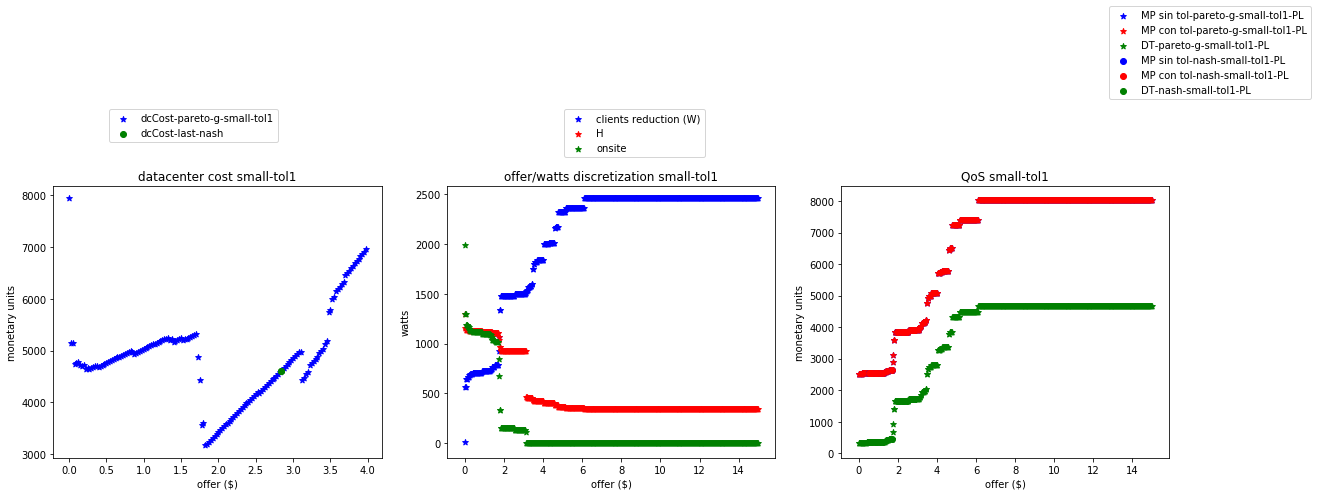

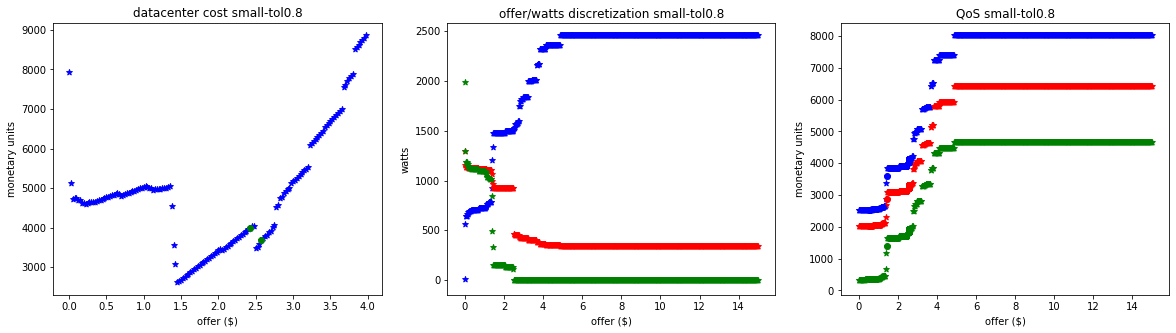

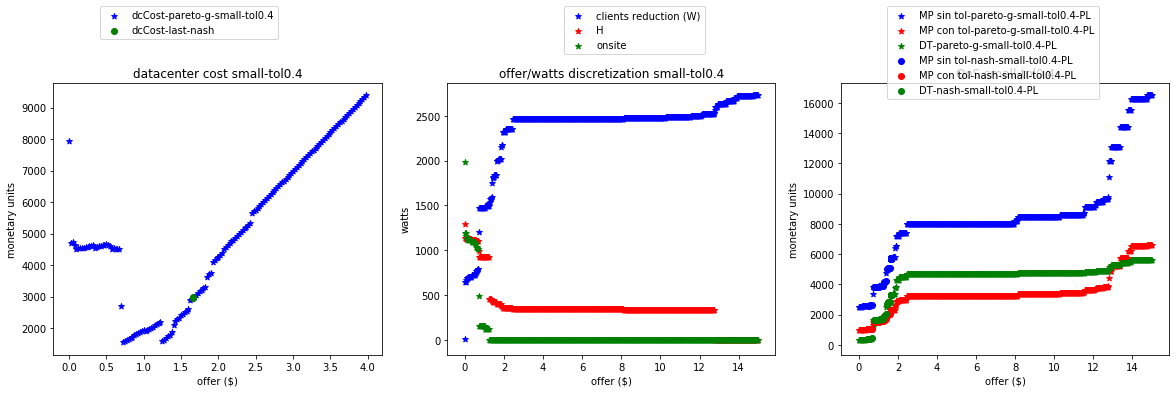

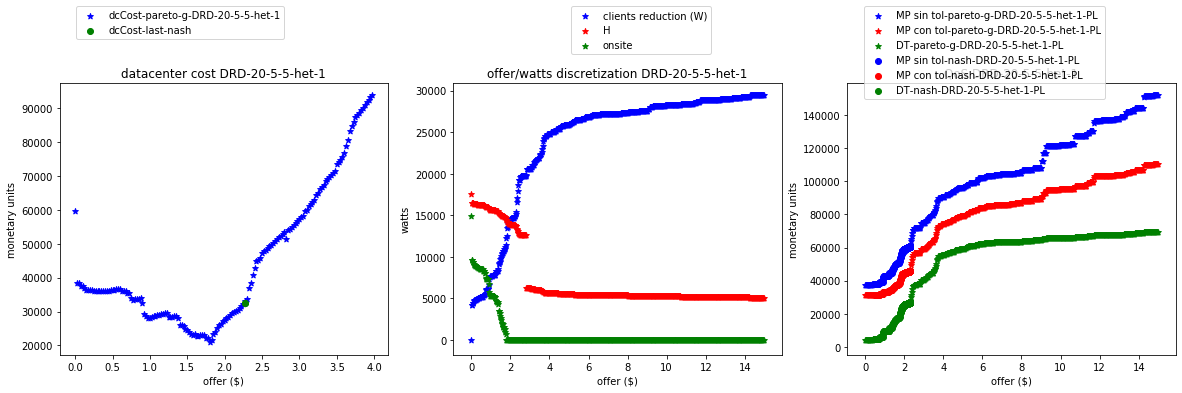

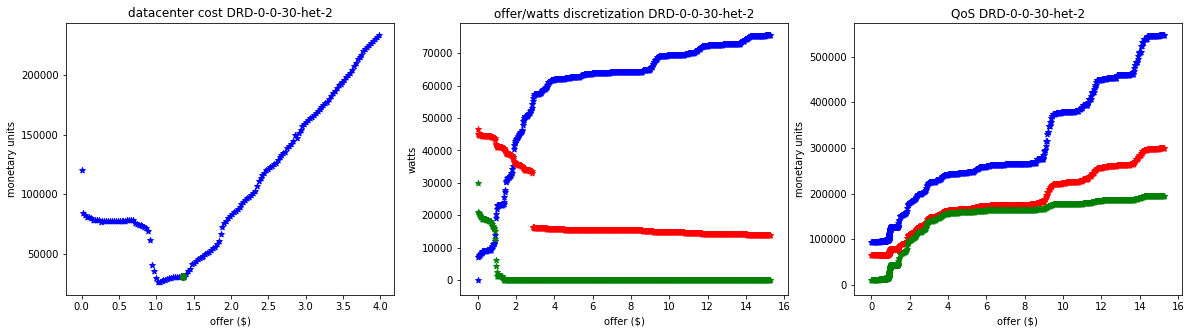

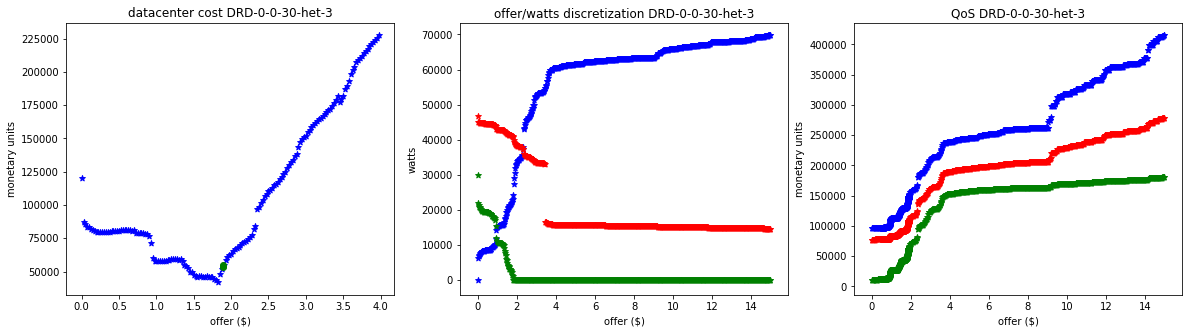

In [324]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 5]

def plotInst(name,no_legend):
    fig, ax = plt.subplots(1,3)
    ax1 = plotCost("pareto-g",name,"PL","null",4,ax[0],"*","b")
    #ax1 = plotCost("nash",name,"PL","null",4,ax[0],"o","r")
    ax1 = plotLastCost("nash",name,"PL","null",4,ax[0],"o","g")

    if not no_legend:
        ax1.legend(loc='best', bbox_to_anchor=(0.7,1.3))
    
    ax1.set_xlabel('offer ($)')
    ax1.set_ylabel('monetary units')
    ax1.set_title('datacenter cost '+ name)
    
    #ax2 = plotPower("pareto-g",name,"PL","null",4,ax[1],"*","b")
    ax2 = plotPower("pareto-g",name,"PL","null",11111111,ax[1],"*","b")

    if not no_legend:
        ax2.legend(loc='best', bbox_to_anchor=(0.8,1.3))
    ax2.set_xlabel('offer ($)')
    ax2.set_ylabel('watts')
    ax2.set_title('offer/watts discretization ' + name)

    
    ax3 = plotQS("pareto-g",name,"PL","null",700000,ax[2],"*","b","r","g")
    ax3 = plotQS("nash",name,"PL","null",700000,ax[2],"o","b","r","g")

    if not no_legend:
        ax3.legend(loc='best', bbox_to_anchor=(0.8,1.3))
    ax3.set_xlabel('offer ($)')
    ax3.set_ylabel('monetary units')
    
    from IPython.core.display import display, HTML
    display(HTML("<style>div.output_scroll { height: 44em; }</style>"))
    ax3.set_title('QoS ' + name)

plotInst('small-tol1',False)
plotInst('small-tol0.8',True)
plotInst('small-tol0.4',False)
#plotInst('DRD-3-1-1-het',False)
#plotInst('medium-tol0.8',True)
#plotInst('medium-tol0.4',True)
#plotInst('large-tol1',True)
#plotInst('large-tol0.8',True)
plotInst('DRD-20-5-5-het-1',False)
plotInst('DRD-0-0-30-het-2',True)
plotInst('DRD-0-0-30-het-3',True)


#plotInst('medium-tol0.4',True)
#plotInst('medium-tol1',True)
#plotInst('large-tol1',True)




In [309]:
def getLow(filename):
    if "PL" in filename:
        return "PL"
    if "PD" in filename:
        return "PD"
    if "DL" in filename:
        return "DL"
    if "lowest-id-first" in filename:
        return "BaU"


def getIns(filename):
    if "small-tol0.4" in filename:
        return "small-tol0.4","small","HM-HM"
    if "small-tol0.8" in filename:
        return "small-tol0.8","small","HM-HM"
    if "small-tol1" in filename:
        return "small-tol1","small","HM-HM"
    if "medium-tol0.4" in filename:
        return "medium-tol0.4","medium","HM-HM"
    if "medium-tol0.8" in filename:
        return "medium-tol0.8","medium","HM-HM"
    if "medium-tol1" in filename:
        return "medium-tol1","medium","HM-HM"
    if "large-tol0.4" in filename:
        return "large-tol0.4","large","HM-HM"
    if "large-tol0.8" in filename:
        return "large-tol0.8","large","HM-HM"
    if "large-tol1" in filename:
        return "large-tol1","large","HM-HM"
    if "DRD-5-0-0-het-1" in filename:
        return "DRD-5-0-0-het-1","small","HM-HT"
    if "DRD-5-0-0-het-2" in filename:
        return "DRD-5-0-0-het-2","small","HM-HT"
    if "DRD-5-0-0-het-3" in filename:
        return "DRD-5-0-0-het-3","small","HM-HT"
    if "DRD-0-10-0-het-1" in filename:
        return "DRD-0-10-0-het-1","medium","HM-HT"
    if "DRD-0-10-0-het-2" in filename:
        return "DRD-0-10-0-het-2","medium","HM-HT"
    if "DRD-0-10-0-het-3" in filename:
        return "DRD-0-10-0-het-3","medium","HM-HT"
    if "DRD-0-0-30-het-1" in filename:
        return "DRD-0-0-30-het-1","large","HM-HT"
    if "DRD-0-0-30-het-2" in filename:
        return "DRD-0-0-30-het-2","large","HM-HT"
    if "DRD-0-0-30-het-3" in filename:
        return "DRD-0-0-30-het-3","large","HM-HT"    
    if "DRD-3-1-1-het-1" in filename:
        return "DRD-3-1-1-het-1","small","HT-HT"
    if "DRD-1-3-1-het-1" in filename:
        return "DRD-1-3-1-het-1","small","HT-HT"
    if "DRD-1-1-3-het-1" in filename:
        return "DRD-1-1-3-het-1","small","HT-HT"
    if "DRD-6-2-2-het-1" in filename:
        return "DRD-6-2-2-het-1","medium","HT-HT"
    if "DRD-2-6-2-het-1" in filename:
        return "DRD-2-6-2-het-1","medium","HT-HT"
    if "DRD-2-2-6-het-1" in filename:
        return "DRD-2-2-6-het-1","medium","HT-HT"
    if "DRD-20-5-5-het-1" in filename:
        return "DRD-20-5-5-het-1","large","HT-HT"
    if "DRD-5-20-5-het-1" in filename:
        return "DRD-5-20-5-het-1","large","HT-HT"   
    if "DRD-5-5-20-het-1" in filename:
        return "DRD-5-5-20-het-1","large","HT-HT"  
    if "DRD-3-1-1-hom-1" in filename:
        return "DRD-3-1-1-hom-1","small","HT-HM"  
    if "DRD-1-3-1-hom-1" in filename:
        return "DRD-1-3-1-hom-1","small","HT-HM"  
    if "DRD-1-1-3-hom-1" in filename:
        return "DRD-1-1-3-hom-1","small","HT-HM"  
    if "DRD-6-2-2-hom-1" in filename:
        return "DRD-6-2-2-hom-1","medium","HT-HM" 
    if "DRD-2-6-2-hom-1" in filename:
        return "DRD-2-6-2-hom-1","medium","HT-HM" 
    if "DRD-2-2-6-hom-1" in filename:
        return "DRD-2-2-6-hom-1","medium","HT-HM"     
    
    if "DRD-20-5-5-hom-1" in filename:
        return "DRD-20-5-5-hom-1","large","HT-HM" 
    if "DRD-5-20-5-hom-1" in filename:
        return "DRD-5-20-5-hom-1","large","HT-HM" 
    if "DRD-5-5-20-hom-1" in filename:
        return "DRD-5-5-20-hom-1","large","HT-HM"     

    print(filename)
    return "1","1","het-hom"     










In [325]:
def tabla1():    
    data = pd.DataFrame()
    for filename in [f for f in os.listdir(report1_dir +'/') if ("nash" in f and ".FUN" in f)]:
        data1 = pd.read_csv(report1_dir +'/' +filename, header=None,sep=' ',skiprows=0,)
        data1.columns = [
                'i','offer ($)', 'clients reduction (W)','motor','err','dcCost','socialCost','#V','VT',
                'tenants','onsite','cool','H','penalty']       
        
        data1['low'] = getLow(filename)
        ins,size,het = getIns(filename)
        data1['ins'] = ins
        data1['size'] = size
        data1['het'] = het
        
        ultimo = data1.iloc[[-1]]['dcCost']
        penultimo = data1.iloc[[-2]]['dcCost']
  
        if ultimo.reset_index()['dcCost'][0]<penultimo.reset_index()['dcCost'][0]:
            data1 = data1.iloc[[-1]]
        else:
            data1 = data1.iloc[[-2]]
        
        data = data.append(data1)        
    data.reset_index().drop(columns=['index'])
    
    

    dataMean = data.groupby(['low','size']).mean().reset_index()
    dataMean = dataMean[['low','size','dcCost','#V','penalty','socialCost']]
    dataMean.columns = ['heuristic','size','avg_cost','DT','MP','CR']
    
    dataStd = data.groupby(['low','size']).std().reset_index()
    dataStd = dataStd[['low','size','dcCost']]
    dataStd.columns = ['heuristic','size','std_cost']
    
    dataMean['std_cost'] = dataStd['std_cost']/dataMean['avg_cost']  
    dataMean = dataMean.round(1)
    
    data = dataMean
    data = data.sort_values(['size','heuristic'],ascending=False) 

    
    return data
    
        
print(tabla1().to_string(index=False)) 

heuristic    size  avg_cost       DT        MP       CR  std_cost
       PL   small    4625.7   4744.9   10280.7   6745.7       0.4
       PD   small    4724.2   4803.4   10338.4   6793.9       0.4
       DL   small   10103.4    761.8    6296.8   4426.7       0.4
      BaU   small   10118.3    772.9    6431.6   4503.3       0.4
       PL  medium   14176.8  15608.0   33859.7  23266.1       0.3
       PD  medium   15018.2  15992.1   34212.3  23608.4       0.3
       DL  medium   31803.1   2418.1   20978.7  15237.4       0.2
      BaU  medium   31616.7   2501.2   21636.9  15690.0       0.2
       PL   large   39426.0  46011.6  115149.8  80272.6       0.3
       PD   large   43159.4  50143.8  119314.3  83034.4       0.3
       DL   large   92852.4   9268.1   79344.5  58301.8       0.2
      BaU   large   92491.7   9453.2   80880.6  59303.7       0.2


In [313]:
def tabla1():    
    data = pd.DataFrame()
    for filename in [f for f in os.listdir(report1_dir +'/') if ("nash" in f and ".FUN" in f)]:
        data1 = pd.read_csv(report1_dir +'/' +filename, header=None,sep=' ',skiprows=0,)
        data1.columns = [
                'i','offer ($)', 'clients reduction (W)','motor','err','dcCost','socialCost','#V','VT',
                'tenants','onsite','cool','H','penalty']       
        
        data1['low'] = getLow(filename)
        ins,size,het = getIns(filename)
        data1['ins'] = ins
        data1['size'] = size
        data1['het'] = het

        
        ultimo = data1.iloc[[-1]]['dcCost']
        penultimo = data1.iloc[[-2]]['dcCost']
  
        if ultimo.reset_index()['dcCost'][0]<penultimo.reset_index()['dcCost'][0]:
            data1 = data1.iloc[[-1]]
        else:
            data1 = data1.iloc[[-2]]
        
        data = data.append(data1)        
    data.reset_index().drop(columns=['index'])
    
    

    dataMean = data.groupby(['low','het']).mean().reset_index()
    dataMean = dataMean[['low','het','dcCost','#V','penalty','socialCost']]
    dataMean.columns = ['heuristic','het','avg_cost','DT','MP','CR']
    
    dataStd = data.groupby(['low','het']).std().reset_index()
    dataStd = dataStd[['low','het','dcCost']]
    dataStd.columns = ['heuristic','het','std_cost']
    
    dataMean['std_cost'] = dataStd['std_cost']/dataMean['avg_cost']  
    dataMean = dataMean.round(1)
    
    data = dataMean
    data = data.sort_values(['het','heuristic'],ascending=False) 

    
    return data
    
        
print(tabla1().to_string(index=False)) 

heuristic    het  avg_cost       DT       MP       CR  std_cost
       PL  HT-HT   17725.4  20230.4  46812.4  31004.1       0.8
       PD  HT-HT   18516.4  20670.8  47299.8  31122.7       0.8
       DL  HT-HT   39383.9   3507.1  30289.8  22351.4       0.8
      BaU  HT-HT   39187.3   3594.8  31049.9  22852.5       0.8
       PL  HT-HM   16612.3  19637.8  45902.1  30777.6       0.8
       PD  HT-HM   17628.2  20081.2  46342.6  31207.0       0.8
       DL  HT-HM   39456.8   3510.6  30242.0  20235.6       0.8
      BaU  HT-HM   39228.0   3574.4  30762.2  20515.6       0.8
       PL  HM-HT   23475.4  25405.6  60899.8  42790.4       1.0
       PD  HM-HT   24465.9  27769.8  63222.0  43905.7       1.0
       DL  HM-HT   50225.9   4773.0  40678.6  31441.7       0.9
      BaU  HM-HT   50151.6   4877.8  41610.0  32117.5       0.9
       PL  HM-HM   19824.8  23212.2  58772.6  42473.7       0.9
       PD  HM-HM   23258.7  26063.9  61622.2  45013.4       1.0
       DL  HM-HM   50612.0   4806.6  409

In [322]:
def tabla1dist():    
    data = pd.DataFrame()
    for filename in [f for f in os.listdir(report1_dir +'/') if ("nash" in f and ".FUN" in f)]:
        data1 = pd.read_csv(report1_dir +'/' +filename, header=None,sep=' ',skiprows=0,)
        data1.columns = [
                'i','offer ($)', 'clients reduction (W)','motor','err','dcCost','socialCost','#V','VT',
                'tenants','onsite','cool','H','penalty']       
        
        data1['low'] = getLow(filename)
        ins,size,het = getIns(filename)
        data1['ins'] = ins
        data1['size'] = size
        data1['het'] = het
        
        ultimo = data1.iloc[[-1]]['dcCost']
        penultimo = data1.iloc[[-2]]['dcCost']
  
        if ultimo.reset_index()['dcCost'][0]<penultimo.reset_index()['dcCost'][0]:
            data1 = data1.iloc[[-1]]
        else:
            data1 = data1.iloc[[-2]]
        
        data = data.append(data1)        
    data.reset_index().drop(columns=['index'])
    
    data['uno'] = 1
    dataSum = data.groupby(['low','size']).sum().reset_index()

    datab = data[['low','size','het','dcCost','#V','penalty','socialCost']]
    datab.columns = ['low','size','het','cost','DT','MP','CR']
    datab.to_csv("data.txt",index=False)
    
    dataMean = data.groupby(['low','size']).mean().reset_index()
    dataMean = dataMean[['low','size','dcCost','#V','penalty','socialCost']]
    dataMean.columns = ['heuristic','size','avg_cost','DT','MP','CR']
    
    dataStd = data.groupby(['low','size']).std().reset_index()
    dataStd = dataStd[['low','size','dcCost']]
    dataStd.columns = ['heuristic','size','std_cost']
    
    dataMean['std_cost'] = dataStd['std_cost']/dataMean['avg_cost']  
    dataMean = dataMean.round(1)
    
    data = dataMean
    data = data.sort_values(['size','heuristic'],ascending=False) 
    #df.boxplot(by ='day', column =['total_bill'], grid = False) 
    return  data
    
        
print(tabla1dist().to_string(index=False)) 

heuristic    size  avg_cost       DT        MP       CR  std_cost
       PL   small    4625.7   4744.9   10280.7   6745.7       0.4
       PD   small    4724.2   4803.4   10338.4   6793.9       0.4
       DL   small   10103.4    761.8    6296.8   4426.7       0.4
      BaU   small   10118.3    772.9    6431.6   4503.3       0.4
       PL  medium   14176.8  15608.0   33859.7  23266.1       0.3
       PD  medium   15018.2  15992.1   34212.3  23608.4       0.3
       DL  medium   31803.1   2418.1   20978.7  15237.4       0.2
      BaU  medium   31616.7   2501.2   21636.9  15690.0       0.2
       PL   large   39426.0  46011.6  115149.8  80272.6       0.3
       PD   large   43159.4  50143.8  119314.3  83034.4       0.3
       DL   large   92852.4   9268.1   79344.5  58301.8       0.2
      BaU   large   92491.7   9453.2   80880.6  59303.7       0.2
